In [1]:
from fastai2.basics import *
from fastai2.vision.all import *
from faststyle import *

In [2]:
learn = torch.load('exports/tn-abstract-starry-mosaic-1024.pkl')

In [3]:
imgs_dir = Path('imgs')
fns = ['lindsey.png']
fns = L(fns).map(lambda o: imgs_dir/o)

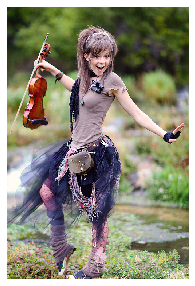

In [4]:
dset = Datasets(fns, tfms=[[PILImageX.create], [PILImage.create]])
show_at(dset, 0)

In [5]:
after_item = [RatioResize(1024), ToTensor()]
after_batch = L(list(learn.dls.after_item)).filter(lambda o: not isinstance(o, RandTransform))

In [21]:
dl = learn.dls.valid.new(dset, after_item=after_item)

In [22]:
_,_,preds = learn.get_preds(dl=dl, with_decoded=True)

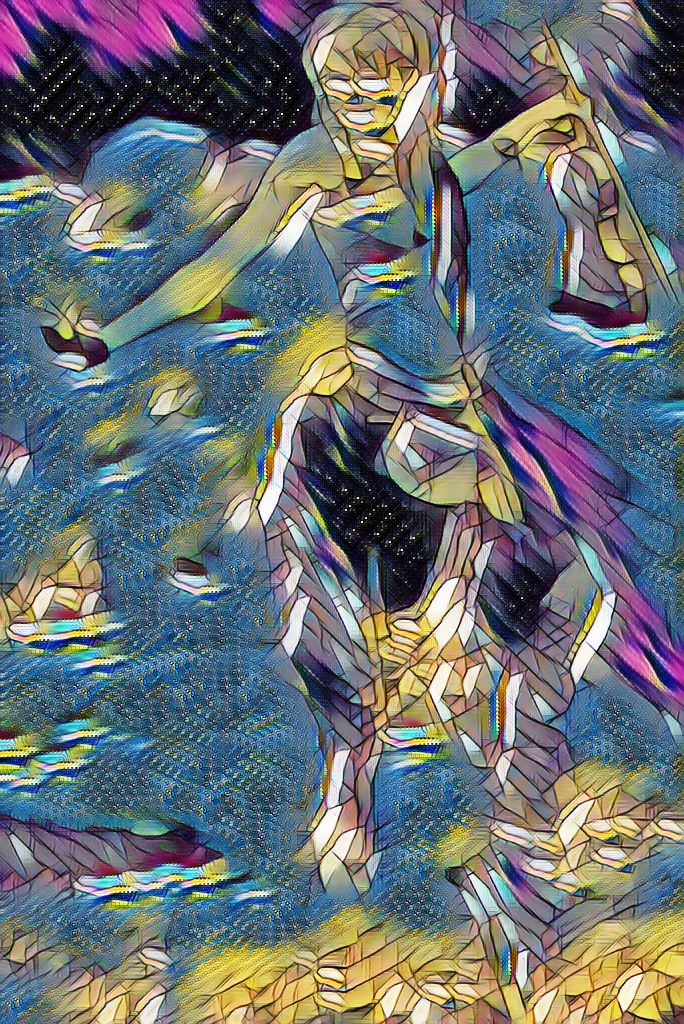

In [51]:
PILImage.create(TensorImage((preds[0]*255).long()))